In [1]:
import numpy as np
import sys
sys.path.insert(1,'../../src')
from _generate_time_series import *
from _shear_frame import *
from utils_OB import *
from _clustering import *
import _tracking as tk
from utils_JK import *
import seaborn as sns
sns.set_theme(context='paper',font_scale=1, style = 'ticks', color_codes='deep')

%load_ext autoreload
%autoreload 2

In [2]:
data_true = np.load('./test_results_flipped/test_3_true_flipped.npz',allow_pickle=True)
true_f = data_true['arr_0']
true_phi = data_true['arr_1']

In [48]:
data = np.load('./test_results/test_3_run_'+str(0)+'.npz',allow_pickle=True)
freqs_out = data['arr_0']
phis_out = data['arr_1']

In [5]:
freqs_out_above, freqs_out_below, phis_out_above, phis_out_below = divide_modes(freqs_out, phis_out, freq_lim=0.8)

In [49]:
n_skipped, fs, dfs, macs = n_skipped_time_seg_clustering2(freqs_out, phis_out, true_f, true_phi, df_lim = 0.3, dmac_lim = 0.5, printinfo = False)

In [50]:
print(np.mean(macs[0,:], where = (macs[0,:] > -1)))
print(np.mean(macs[1,:], where = (macs[1,:] > -1)))
print(np.mean(macs[2,:], where = (macs[2,:] > -1)))
print(np.mean(macs[3,:], where = (macs[3,:] > -1)))
print(np.mean(macs, axis=(1) ,where = (macs > -1))[:4])

0.8415161513645353
0.8432519923455348
0.9634311180441925
0.9569642574232825
[0.84151615 0.84325199 0.96343112 0.95696426]


(-0.1, 0.8)

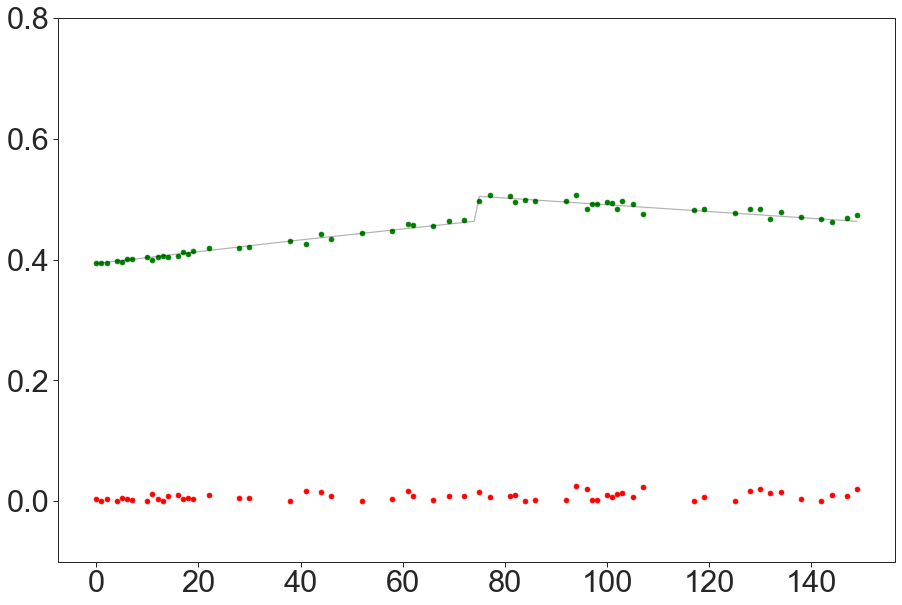

In [26]:
# fig, axs = plt.subplots(figsize = (15,10))

# axs.scatter(np.arange(0,150,1), dfs[0,:], label = 'Mode {}'.format(0), color = 'red')

# axs.plot(np.arange(0, 150, 1), true_f[:,0], label = 'First mode, y-direction', color = 'black', alpha = 0.3)

# axs.scatter(np.arange(0, 150, 1), fs[0,:], color = 'green')

# axs.set_ylim(-0.1, 0.8)

# # for k, freq in enumerate(freqs_out_below):
# #     axs.scatter(np.ones_like(freq)*k, freq, color = 'black', alpha=0.2)


# #axs.legend()

In [3]:
n_skipped_seg_clustering_each_run = np.zeros((4, 50))
avg_mac = np.zeros_like(n_skipped_seg_clustering_each_run)

for i in range(50):
    datai = np.load('./test_results_flipped/test_3_run_'+str(i)+'_flipped.npz',allow_pickle=True)
    freqs_outi = datai['arr_0']
    phis_outi = datai['arr_1']

    n_skipped_seg_clusteringi,_,_,macsi = n_skipped_time_seg_clustering2(freqs_out=freqs_outi, phis_out=phis_outi, true_freqs_sorted=true_f, true_phi_sorted=true_phi, df_lim=0.15, dmac_lim=0.2)

    n_skipped_seg_clustering_each_run[:,i] = n_skipped_seg_clusteringi
    avg_mac[:, i] = np.mean(macsi, axis=(1) ,where = (macsi > -1))[:4]

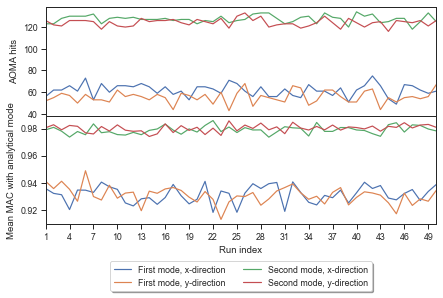

In [7]:
fig = plt.figure(figsize=(7,4))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=False, sharey=False)
#fig.suptitle('Sharing both axes')
axs[0].plot(np.arange(1, 51, 1), 150 - n_skipped_seg_clustering_each_run[1,:][:50], label = 'First mode, x-direction')
axs[0].plot(np.arange(1, 51, 1), 150 - n_skipped_seg_clustering_each_run[0,:][:50], label = 'First mode, y-direction')
axs[0].plot(np.arange(1, 51, 1), 150 - n_skipped_seg_clustering_each_run[3,:][:50], label = 'Second mode, x-direction')
axs[0].plot(np.arange(1, 51, 1), 150 - n_skipped_seg_clustering_each_run[2,:][:50], label = 'Second mode, y-direction')
axs[1].plot(np.arange(1, 51, 1), avg_mac[1,:][:50], label = 'First mode, x-direction')
axs[1].plot(np.arange(1, 51, 1), avg_mac[0,:][:50], label = 'First mode, y-direction')
axs[1].plot(np.arange(1, 51, 1), avg_mac[3,:][:50], label = 'Second mode, x-direction')
axs[1].plot(np.arange(1, 51, 1), avg_mac[2,:][:50], label = 'Second mode, y-direction')
axs[1].set_xlabel('Run index')
axs[1].set_ylabel('Mean MAC with analytical mode')
axs[0].set_ylabel('AOMA hits')
axs[1].set_xlim(1, 50)
axs[0].set_xlim(1, 50)
axs[1].set_xticks(np.arange(1, 51, 3))
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=2)

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

fig.savefig('./figures_flipped/AOMA_quality', dpi = 300,bbox_inches = 'tight')